# Imports!

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Data Cleaning and Set Up

In [2]:
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994]

for year in years:
    ucsd_enr = pd.read_excel(f'/Users/tvidyala/Desktop/uc uh oh!/Enrollment/ucsd {year} enr.xlsx')
    ucsd_enr.columns = ucsd_enr.columns.str.strip()
    ucsd_enr = ucsd_enr.rename(columns={
        'School': 'school', 'City': 'city', 'County/State/ Territory': 'county',
        'Count': 'status', 'All': 'total'
    }).query("status != 'Enr'").drop(['Calculation1', 'Female', 'Male', 'Other', 'Unknown'], axis=1)
    ucsd_enr['school'] = ucsd_enr['school'].fillna(method='ffill')
    ucsd_enr['city'] = ucsd_enr['city'].fillna(method='ffill')
    ucsd_enr['county'] = ucsd_enr['county'].fillna(method='ffill')
    ucsd_enr['total'] = ucsd_enr['total'].fillna(0)
    ucsd_enr = ucsd_enr.pivot_table(index=['school', 'city', 'county'], columns='status', values='total', fill_value=0).reset_index()
    ucsd_enr['acceptance_rate'] = (ucsd_enr['Adm'] / ucsd_enr['App'] * 100).round(2)
    ucsd_gpa = pd.read_excel(f'/Users/tvidyala/Desktop/uc uh oh!/GPA/ucsd {year} gpa.xlsx')
    ucsd_gpa.columns = ucsd_gpa.columns.str.strip()
    ucsd_gpa = ucsd_gpa.drop(['Calculation1', 'Enrl GPA'], axis=1).rename(columns={
        'School': 'school', 'City': 'city', 'County/State/Country': 'county',
        'App GPA': 'app_gpa', 'Adm GPA': 'adm_gpa'
    }).round({'app_gpa': 2, 'adm_gpa': 2})
    ucsd = pd.merge(ucsd_enr, ucsd_gpa, on=['school', 'city', 'county'], how='left')
    ucsd = ucsd.rename(columns={'Adm': 'adm', 'App': 'app'})
    ucsd.to_csv(f'/Users/tvidyala/Desktop/uc uh oh!/uc clean data/ucsd {year}.csv', index=False)

In [3]:
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years:
    globals()[f'ucsd_{year}'] = pd.read_csv(f'/Users/tvidyala/Desktop/uc uh oh!/uc clean data/ucsd {year}.csv')

In [4]:
ucsd_2023

,school,city,county,adm,app,acceptance_rate,app_gpa,adm_gpa
0,A B MILLER HIGH SCHOOL,Fontana,San Bernardino,14,28,50.00,3.73,4.09
1,ABLE CHARTER,Stockton,San Joaquin,0,5,0.00,NaN,NaN
2,ABRAHAM LINCOLN HIGH SCHOOL,Los Angeles,Los Angeles,25,52,48.08,3.78,4.08
3,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,62,227,27.31,4.02,4.24
4,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,9,49,18.37,4.05,4.28
...,...,...,...,...,...,...,...,...
1520,YUBA CITY CHARTER SCHOOL,Yuba City,Sutter,0,0,NaN,NaN,NaN
1521,YUBA CITY HIGH SCHOOL,Yuba City,Sutter,4,28,14.29,3.90,NaN
1522,YUBA CITY INDEPENDENCE ACADEMY,Yuba City,Sutter,0,0,NaN,NaN,NaN
1523,YUCAIPA SENIOR HIGH SCHOOL,Yucaipa,San Bernardino,11,63,17.46,3.92,4.27


# Visualizing Acceptance Rates

## View by City

(0.0, 79.90865949119373)

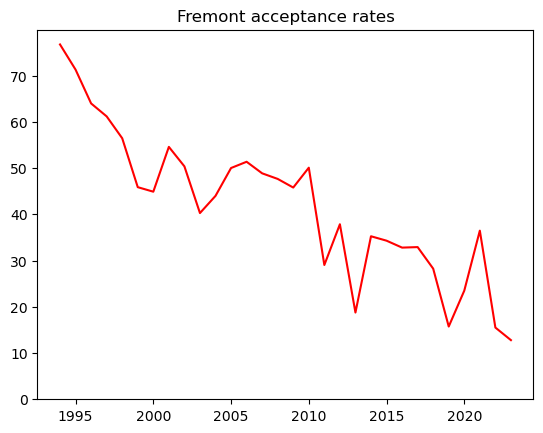

In [5]:
my_city = "Fremont"
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
acceptance_rates = []
avg_gpa = []
gpa_diff = []
num_applying = []

for year in years:
    data = globals()[f'ucsd_{year}']
    city_data = data.loc[data.city == my_city]
    num_applying.append(city_data['app'].sum())
    acceptance_rates.append((city_data['adm'].sum()/city_data['app'].sum())*100)
    avg_gpa.append(city_data['adm_gpa'].mean())
    gpa_diff.append(city_data['app_gpa'].mean() - city_data['adm_gpa'].mean())
    
plt.title(f'{my_city} acceptance rates')
plt.plot(years, acceptance_rates, color = 'r')
plt.ylim(bottom=0) 

## View by County

(0.0, 72.33407832086289)

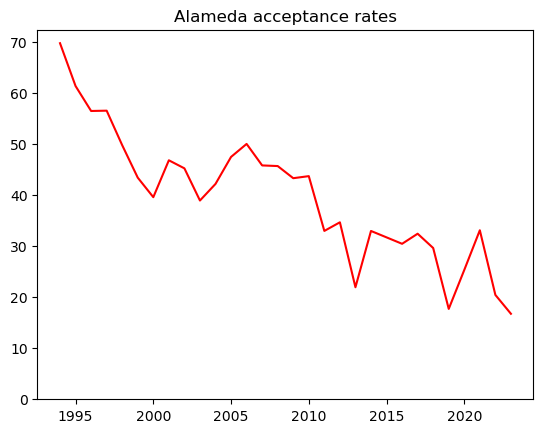

In [6]:
my_county = "Alameda"
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
acceptance_rates = []
avg_gpa = []
gpa_diff = []
num_applying = []

for year in years:
    data = globals()[f'ucsd_{year}']
    county_data = data.loc[data.county == my_county]
    num_applying.append(county_data['app'].sum())
    acceptance_rates.append((county_data['adm'].sum()/county_data['app'].sum())*100)
    avg_gpa.append(county_data['adm_gpa'].mean())
    gpa_diff.append(county_data['app_gpa'].mean() - county_data['adm_gpa'].mean())
    
plt.title(f'{my_county} acceptance rates')
plt.plot(years, acceptance_rates, color = 'r')
plt.ylim(bottom=0) 

## View By Entire California

(0.0, 67.3319273387017)

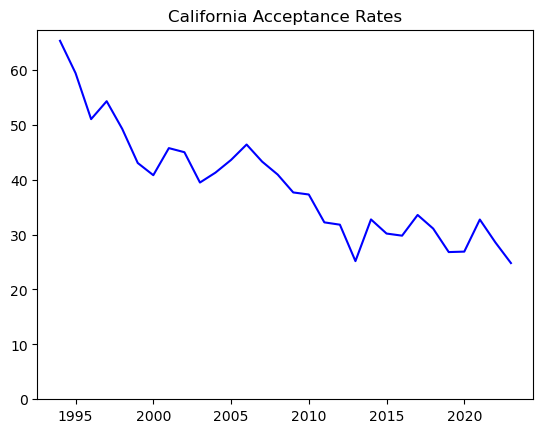

In [7]:
years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
acceptance_rates = []
avg_gpa = []
gpa_diff = []
num_applying = []

for year in years:
    data = globals()[f'ucsd_{year}']
    acceptance_rates.append((data.adm.sum()/data.app.sum())*100)
    avg_gpa.append(data.adm_gpa.mean())
    gpa_diff.append(data.adm_gpa.mean()-data.app_gpa.mean())
    num_applying.append(data.app.sum())
    
plt.title(f'California Acceptance Rates')
plt.plot(years, acceptance_rates, color = 'b') # change based on which you want to view
plt.ylim(bottom=0) 

# Predict Future Data

## Put all of it into one ginormous file!

In [10]:
ucsd = pd.DataFrame()
ucsd.to_csv('ucsd.csv')

years = [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
for yr in years:
    data = globals()[f'ucsd_{yr}']
    data['year'] = str(yr)
    
ucsd = pd.concat([ucsd_1994, ucsd_1995, ucsd_1996, ucsd_1997, ucsd_1998, ucsd_1999, ucsd_2000, ucsd_2001, ucsd_2002, ucsd_2003, ucsd_2004, ucsd_2005, ucsd_2006, ucsd_2007, ucsd_2008, ucsd_2009, ucsd_2010, ucsd_2011, ucsd_2012, ucsd_2013, ucsd_2014, ucsd_2015, ucsd_2016, ucsd_2017, ucsd_2018, ucsd_2019, ucsd_2020, ucsd_2021, ucsd_2022, ucsd_2023], axis = 0, ignore_index = True)
ucsd = ucsd.fillna(0)

In [11]:
import geopy
from geopy.geocoders import Nominatim

loc = Nominatim(user_agent="GetLoc")
lat = []
long = []
cityLats = {}
cityLongs = {}

for idx in range(len(ucsd)):        
    cityName = ucsd.loc[idx].city
    if cityName in cityLats and cityName in cityLongs:
        lat.append(cityLats[cityName])
        long.append(cityLongs[cityName])
    else: 
        getLoc = loc.geocode(cityName)
        if getLoc is None:
            lat.append(0)
            long.append(0)
        else:
            cityLongs[cityName] = getLoc.longitude
            cityLats[cityName] = getLoc.latitude
            lat.append(getLoc.latitude)
            long.append(getLoc.longitude)
            
ucsd['latitude'] = lat
ucsd['longitude'] = long

In [13]:
ucsd.to_csv('ucsd.csv')

In [12]:
ucsd[ucsd.school == "AMERICAN HIGH SCHOOL"]

,school,city,county,adm,app,acceptance_rate,app_gpa,adm_gpa,year,latitude,longitude
18,AMERICAN HIGH SCHOOL,Fremont,Alameda,5.0,12.0,41.67,3.77,3.97,1994,37.54827,-121.988571
747,AMERICAN HIGH SCHOOL,Fremont,Alameda,7.0,12.0,58.33,3.55,3.91,1995,37.54827,-121.988571
1493,AMERICAN HIGH SCHOOL,Fremont,Alameda,6.0,12.0,50.00,3.72,4.27,1996,37.54827,-121.988571
2261,AMERICAN HIGH SCHOOL,Fremont,Alameda,8.0,20.0,40.00,3.62,4.02,1997,37.54827,-121.988571
3045,AMERICAN HIGH SCHOOL,Fremont,Alameda,7.0,15.0,46.67,3.71,4.04,1998,37.54827,-121.988571
3840,AMERICAN HIGH SCHOOL,Fremont,Alameda,6.0,21.0,28.57,3.78,4.08,1999,37.54827,-121.988571
4675,AMERICAN HIGH SCHOOL,Fremont,Alameda,7.0,20.0,35.00,3.80,4.09,2000,37.54827,-121.988571
5532,AMERICAN HIGH SCHOOL,Fremont,Alameda,19.0,32.0,59.38,3.98,4.23,2001,37.54827,-121.988571
6415,AMERICAN HIGH SCHOOL,Fremont,Alameda,6.0,23.0,26.09,3.69,4.23,2002,37.54827,-121.988571
7310,AMERICAN HIGH SCHOOL,Fremont,Alameda,13.0,32.0,40.62,3.92,4.18,2003,37.54827,-121.988571


## Random Forest Regressor to Predict Acceptance Rates

In [276]:
uc_predictor = RandomForestRegressor(random_state = 41, n_estimators = 50)

features = ['year', 'adm_gpa', 'app_gpa', 'latitude', 'longitude']

X = ucsd[features]
y = ucsd.acceptance_rate

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
uc_predictor.fit(train_X, train_y)
predictions = uc_predictor.predict(val_X)
print(mean_absolute_error(val_y, predictions))

9.59600270128865


Lowkey not bad, It's about a 90.44% accuracy rate.

### Predict a Specific Value

In [277]:
uc_predictor = RandomForestRegressor(random_state = 42, n_estimators = 50) 
features = ['year', 'latitude', 'longitude', 'app_gpa']

X = ucsd[features]
y = ucsd.acceptance_rate
input_data = np.array([[2022, 37.54827, -121.988571, 3.6]])

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
uc_predictor.fit(train_X, train_y)
predictions = uc_predictor.predict(input_data)
print(f'The predicted acceptance rate is {predictions[0]:.2f}')

The predicted acceptance rate is 6.23


/Users/tvidyala/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Visualizing Future Acceptance and GPA Trends

In [334]:
ucsd_by_year = ucsd.groupby('year')['acceptance_rate'].mean().reset_index()
ucsd_by_year = pd.DataFrame(ucsd_by_year)
ucsd_by_year['year'] = pd.to_datetime(ucsd_by_year['year'], format='%Y')
ucsd_by_year

,year,acceptance_rate
0,1994-01-01,45.097143
1,1995-01-01,41.500910
2,1996-01-01,34.401904
3,1997-01-01,37.170702
4,1998-01-01,34.635934
5,1999-01-01,30.374279
6,2000-01-01,30.447345
7,2001-01-01,33.741993
8,2002-01-01,36.670596
9,2003-01-01,32.217133


In [342]:
arima_model = ARIMA(ucsd_by_year['acceptance_rate'], order=(1, 2, 3)).fit()

year_count = 20 
year_list = [2023 + num for num in range(1, year_count + 1)]

forecast_values = arima_model.forecast(steps=year_count)
forecast_values = forecast_values.tolist()

forecast = pd.DataFrame()
forecast['year'] = year_list
forecast['acceptance_rate'] = forecast_values
forecast


,year,acceptance_rate
0,2024,23.902095
1,2025,22.340456
2,2026,22.959432
3,2027,22.064569
4,2028,22.220651
5,2029,21.647140
6,2030,21.580132
7,2031,21.161497
8,2032,20.986970
9,2033,20.642977


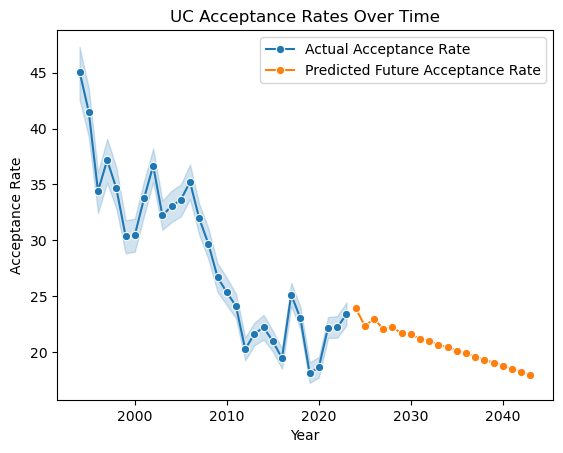

In [343]:
sns.lineplot(data=ucsd, x='year', y='acceptance_rate', label='Actual Acceptance Rate', marker='o')
sns.lineplot(data=forecast, x='year', y='acceptance_rate', label='Predicted Future Acceptance Rate', marker='o')
plt.title('UC Acceptance Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Acceptance Rate')
plt.legend()

# Show the plot
plt.show()